In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt

##################### Import data and change to datetime ########################################

site1 = pd.read_csv(r'C:\Users\sph0088\OneDrive - UNT System\MORA\Analysis\templogger\site1_temps.csv').dropna()
site2 = pd.read_csv(r'C:\Users\sph0088\OneDrive - UNT System\MORA\Analysis\templogger\site2_temps.csv').dropna()
site3 = pd.read_csv(r'C:\Users\sph0088\OneDrive - UNT System\MORA\Analysis\templogger\site3_temps.csv').dropna()
site4 = pd.read_csv(r'C:\Users\sph0088\OneDrive - UNT System\MORA\Analysis\templogger\site4_temps.csv').dropna()

site1['date'] = pd.to_datetime(site1['date'], format='%Y/%m/%d %H:%M')
site2['date'] = pd.to_datetime(site2['date'], format='%m/%d/%Y %H:%M')
site3['date'] = pd.to_datetime(site3['date'], format='%Y/%m/%d %H:%M')
site4['date'] = pd.to_datetime(site4['date'], format='%Y/%m/%d %H:%M')


site1['date'] = site1['date'].dt.floor('H') #Drops off the minutes and seconds of the time
site1 = pd.DataFrame(site1.groupby(['date'],as_index=False).mean())
site1.columns = ['date','temp_F_site1']

site2['date'] = site2['date'].dt.floor('H') #Drops off the minutes and seconds of the time
site2 = pd.DataFrame(site2.groupby(['date'],as_index=False).mean())
site2.columns = ['date','temp_F_site2']


site3['date'] = site3['date'].dt.floor('H') #Drops off the minutes and seconds of the time
site3 = pd.DataFrame(site3.groupby(['date'],as_index=False).mean())
site3.columns = ['date','temp_F_site3']

site4['date'] = site4['date'].dt.floor('H') #Drops off the minutes and seconds of the time
site4 = pd.DataFrame(site4.groupby(['date'],as_index=False).mean())
site4.columns = ['date','temp_F_site4']

df = site1.merge(site2, on='date', how='outer')
df = df.merge(site3, on='date', how='outer')
df = df.merge(site4, on='date', how='outer')
# df.to_csv(r'C:\Users\sph0088\OneDrive - UNT System\MORA\Analysis\templogger\merged.csv',index=False)

In [77]:
df = pd.read_csv(r'C:\Users\sph0088\OneDrive - UNT System\MORA\Analysis\templogger\temploggers_allsites.csv')
df = df[['date','temp_F_site1','temp_F_site4']]
df['date'] =  pd.to_datetime(df['date'], format='%m/%d/%Y %H:%M')
#Creates a new column with only hour
df['hour'] = pd.DatetimeIndex(df['date']).hour


df = df[(df['hour']>=16)&(df['hour']<=22)] 
df = df.dropna()
df['temp_diff']= df['temp_F_site4'] - df['temp_F_site1']
df = df[['date','hour','temp_F_site1','temp_F_site4','temp_diff']]

df['date'] = df['date'].dt.floor('d')
df = pd.DataFrame(df.groupby(['date'], as_index=False).mean())

df.loc[df['temp_diff'] >= 0, 'inversion'] = 1
df.loc[df['temp_diff'] < 0, 'inversion'] = 0
df.head()


In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

pm25 = pd.read_csv(r'C:\Users\sph0088\OneDrive - UNT System\MORA\Analysis\ohana_nightly_alldata_2009-2020_9pm-1am.csv')
pm25 = pm25[['date','pm25']]
pm25['date'] = pd.to_datetime(pm25['date'],format='%m/%d/%Y')
df = df.merge(pm25,on='date')
df.head()
df.to_csv(r'C:\Users\sph0088\OneDrive - UNT System\MORA\Analysis\Inversion\inversion_data.csv',index=False)

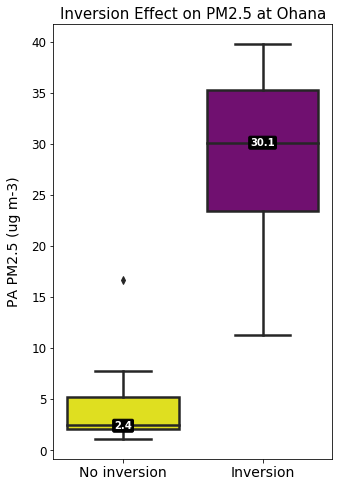

In [74]:
start_date = '2020/07/04'
end_date = '2020/08/04'

df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]
df

inversion = df['inversion'].map({0: 'No inversion', 1: 'Inversion'})
plt.figure(figsize=(5,8))
my_pal = {"Inversion": "purple", "No inversion": "yellow"}
ax = sns.boxplot(x=inversion, y=df["pm25"],order=['No inversion','Inversion'], linewidth=2.5, palette=my_pal)
ax.tick_params(axis='x', which='major', labelsize=14) #Default selection is major
ax.tick_params(axis='y', which='major', labelsize=12) #axis='both' to change both at once
plt.xlabel('')
plt.ylabel('PA PM2.5 (ug m-3)',fontsize=14, labelpad=10)
plt.title('Inversion Effect on PM2.5 at Ohana', size=15, pad=5)

#Display median onto each box plot
v = ax.axes
lines = v.get_lines()
categories = v.get_xticks()

for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*6].get_ydata()[0],1) 

    v.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=10,
        color='white',
        bbox=dict(boxstyle='round',facecolor='black',edgecolor='black', pad=0.15))

# ax.figure.tight_layout()

In [ ]:
start_date = '2020/07/04'
end_date = '2020/08/04'

df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]
df

inversion = df['inversion'].map({0: 'No inversion', 1: 'Inversion'})
plt.figure(figsize=(5,8))
my_pal = {"Inversion": "purple", "No inversion": "yellow"}
ax = sns.boxplot(x=inversion, y=df["pm25"],order=['No inversion','Inversion'], linewidth=2.5, palette=my_pal)
ax.tick_params(axis='x', which='major', labelsize=14) #Default selection is major
ax.tick_params(axis='y', which='major', labelsize=12) #axis='both' to change both at once
plt.xlabel('')
plt.ylabel('PA PM2.5 (ug m-3)',fontsize=14, labelpad=10)
plt.title('Inversion Effect on PM2.5 at Ohana', size=15, pad=5)

#Display median onto each box plot
v = ax.axes
lines = v.get_lines()
categories = v.get_xticks()

for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*6].get_ydata()[0],1) 

    v.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=10,
        color='white',
        bbox=dict(boxstyle='round',facecolor='black',edgecolor='black', pad=0.15))

# ax.figure.tight_layout()